<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




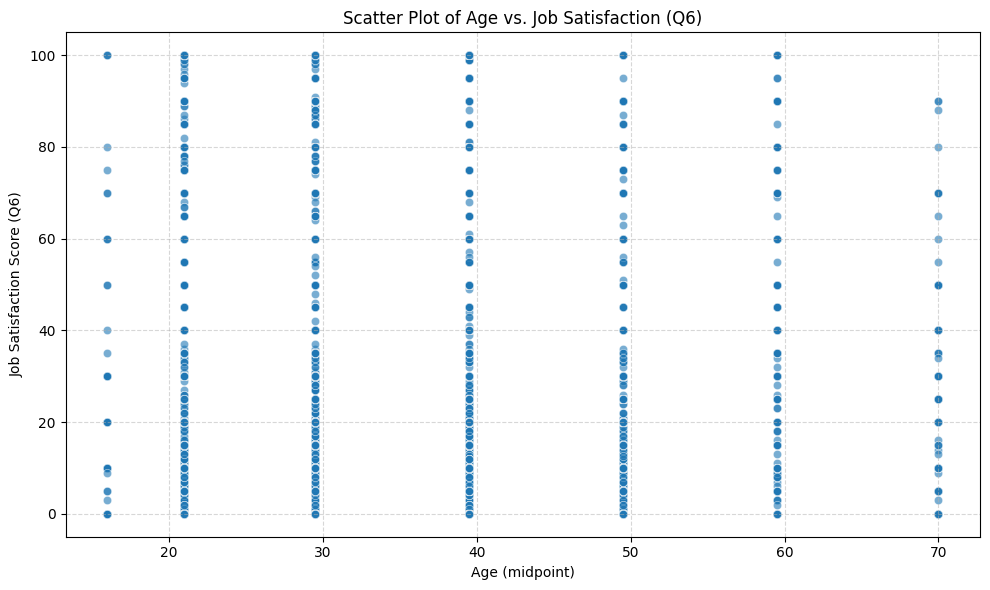

In [3]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Connect to SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Step 2: Query Age and JobSatPoints_6
query = """
SELECT Age, JobSatPoints_6
FROM main
WHERE Age IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Convert age groups to numeric midpoints
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}
df['Age'] = df['Age'].map(age_mapping)
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df = df.dropna()

# Step 4: Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='JobSatPoints_6', alpha=0.6)
plt.title("Scatter Plot of Age vs. Job Satisfaction (Q6)")
plt.xlabel("Age (midpoint)")
plt.ylabel("Job Satisfaction Score (Q6)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


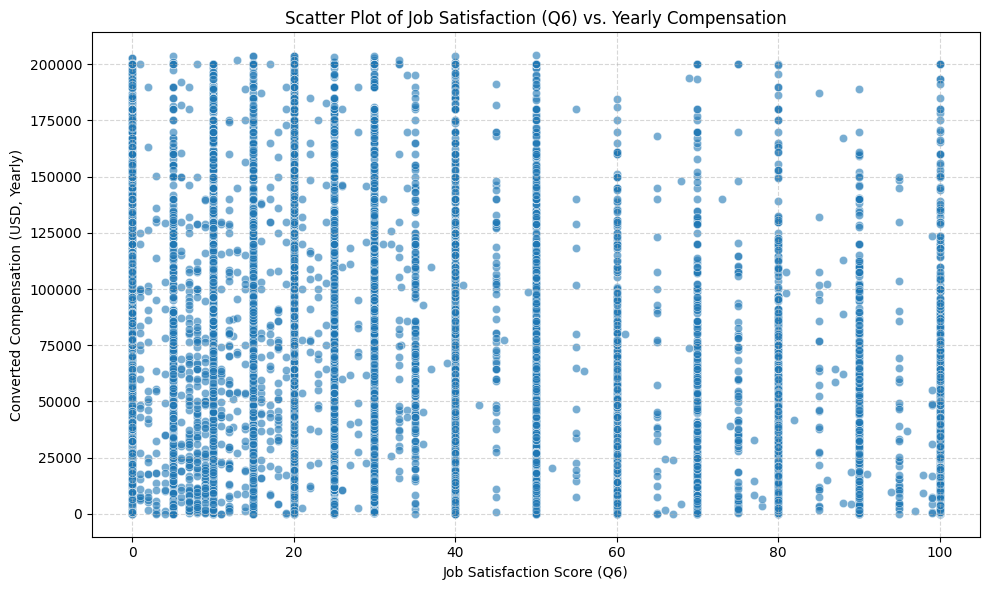

In [4]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Connect to the database
conn = sqlite3.connect("survey-data.sqlite")

# Step 2: Query relevant columns
query = """
SELECT ConvertedCompYearly, JobSatPoints_6
FROM main
WHERE ConvertedCompYearly IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Clean and convert types
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df = df.dropna()

# Optionally: Remove extreme outliers for better plot readability
df = df[df['ConvertedCompYearly'] < df['ConvertedCompYearly'].quantile(0.95)]

# Step 4: Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='JobSatPoints_6', y='ConvertedCompYearly', alpha=0.6)
plt.title("Scatter Plot of Job Satisfaction (Q6) vs. Yearly Compensation")
plt.xlabel("Job Satisfaction Score (Q6)")
plt.ylabel("Converted Compensation (USD, Yearly)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


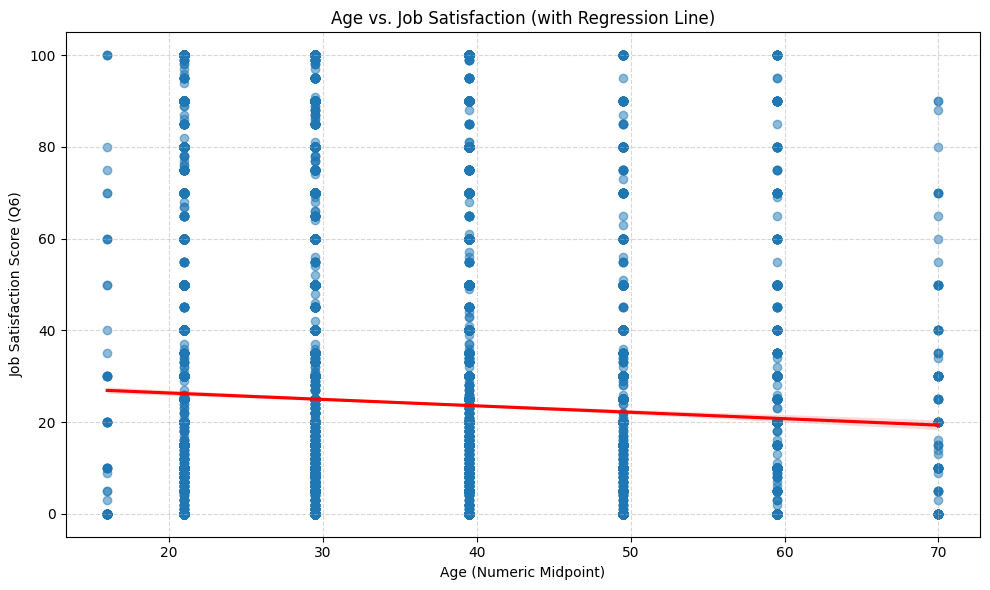

In [5]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Query Age and JobSatPoints_6 columns
query = """
SELECT Age, JobSatPoints_6
FROM main
WHERE Age IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Convert Age categories to numeric midpoints
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

df['AgeNumeric'] = df['Age'].map(age_mapping)
df = df.dropna()

# Convert JobSatPoints_6 to numeric
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df = df.dropna()

# Plot with trend line
plt.figure(figsize=(10, 6))
sns.regplot(x='AgeNumeric', y='JobSatPoints_6', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title("Age vs. Job Satisfaction (with Regression Line)")
plt.xlabel("Age (Numeric Midpoint)")
plt.ylabel("Job Satisfaction Score (Q6)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


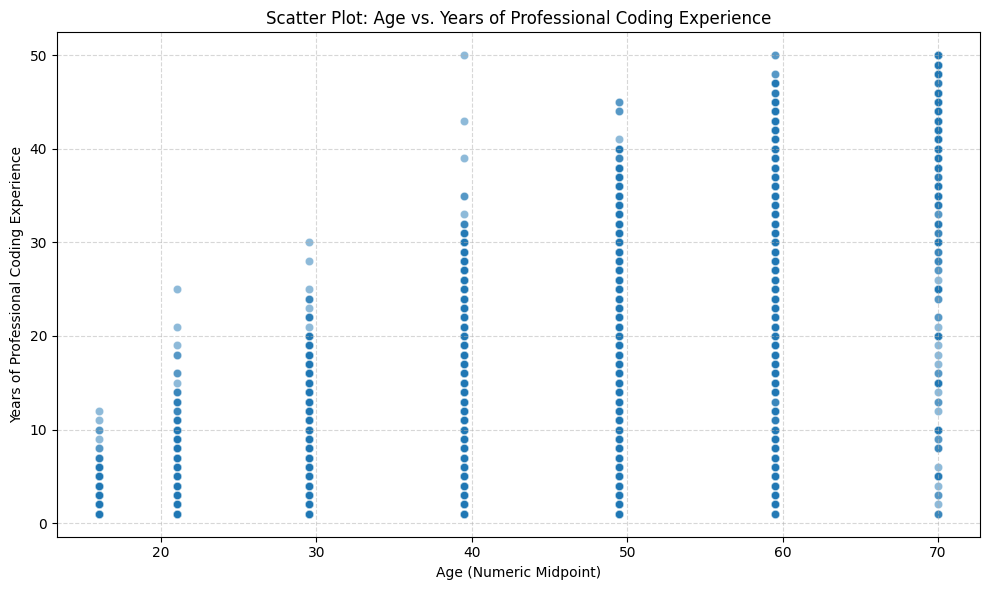

In [6]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Query Age and YearsCodePro columns
query = """
SELECT Age, YearsCodePro
FROM main
WHERE Age IS NOT NULL AND YearsCodePro IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Map Age to numeric midpoints
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Convert YearsCodePro to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop missing or invalid rows
df = df.dropna()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='AgeNumeric', y='YearsCodePro', alpha=0.5)
plt.title("Scatter Plot: Age vs. Years of Professional Coding Experience")
plt.xlabel("Age (Numeric Midpoint)")
plt.ylabel("Years of Professional Coding Experience")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


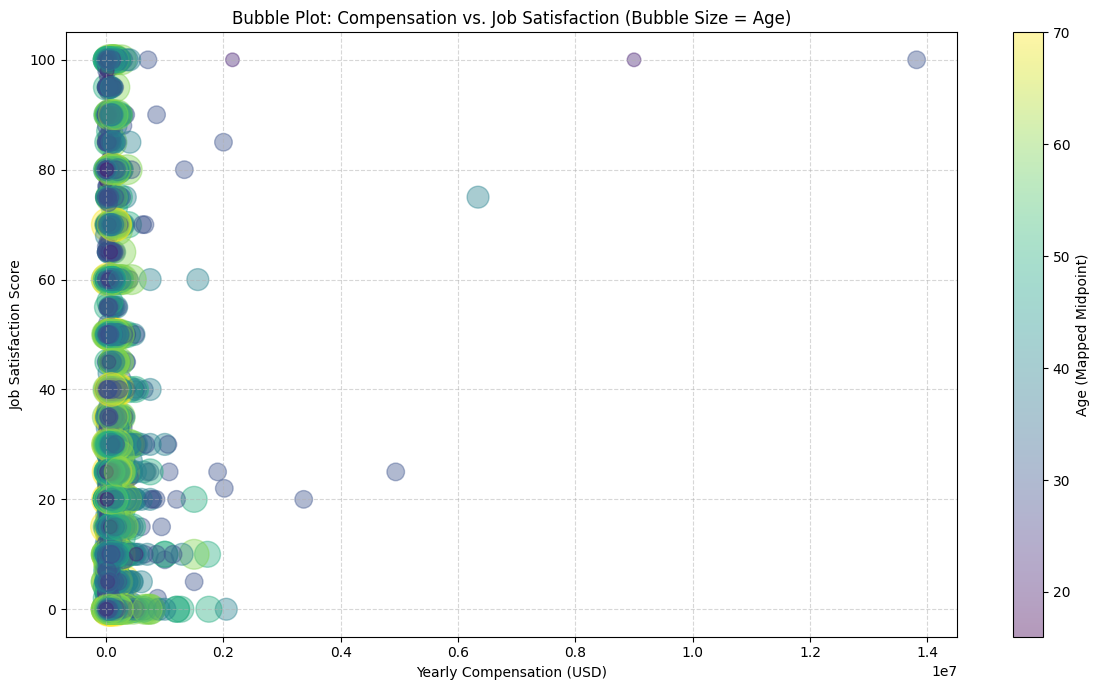

In [7]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Query required columns
query = """
SELECT Age, ConvertedCompYearly, JobSatPoints_6
FROM main
WHERE Age IS NOT NULL AND ConvertedCompYearly IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Map Age to numeric midpoints
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['AgeNumeric'] = df['Age'].map(age_map)

# Drop rows with missing values
df = df.dropna()

# Scale bubble size (optional: square root to reduce size extremes)
bubble_size = df['AgeNumeric'] ** 1.5

# Plot
plt.figure(figsize=(12, 7))
plt.scatter(
    x=df['ConvertedCompYearly'],
    y=df['JobSatPoints_6'],
    s=bubble_size,
    alpha=0.4,
    c=df['AgeNumeric'],
    cmap='viridis'
)
plt.colorbar(label='Age (Mapped Midpoint)')
plt.title("Bubble Plot: Compensation vs. Job Satisfaction (Bubble Size = Age)")
plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Job Satisfaction Score")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


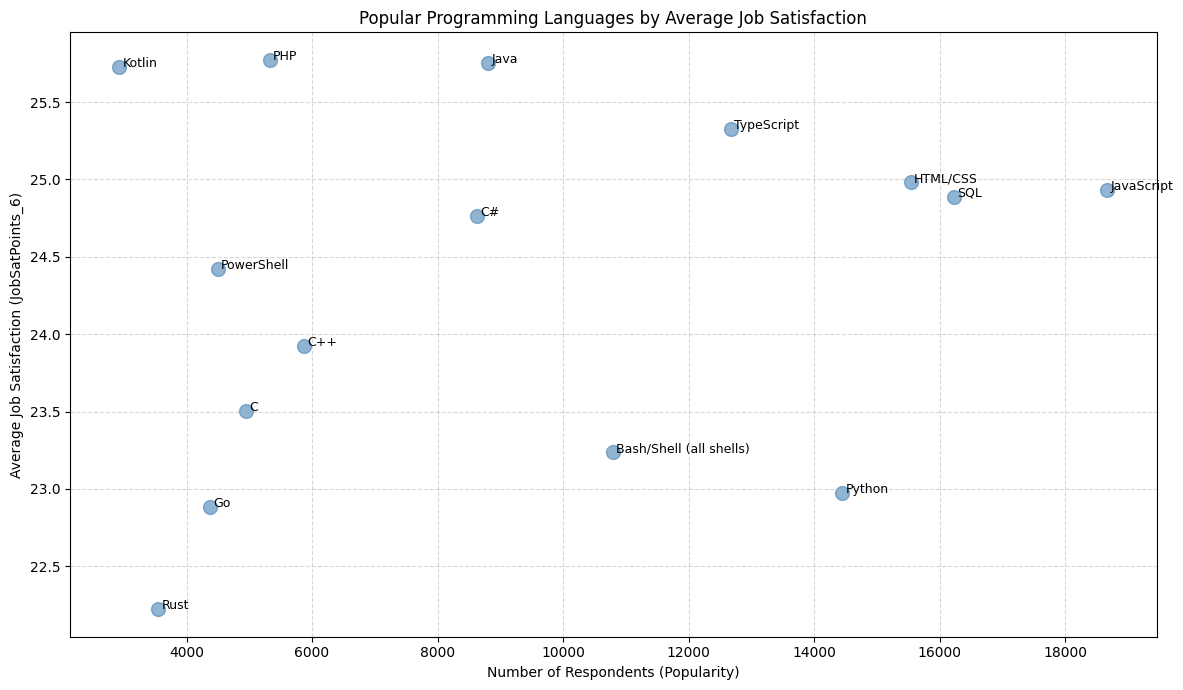

In [8]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Load necessary columns
query = """
SELECT LanguageHaveWorkedWith, JobSatPoints_6
FROM main
WHERE LanguageHaveWorkedWith IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Split languages into individual entries (semicolon-separated)
language_rows = []
for _, row in df.iterrows():
    languages = str(row["LanguageHaveWorkedWith"]).split(';')
    for lang in languages:
        language_rows.append((lang.strip(), row["JobSatPoints_6"]))

# Create a new DataFrame
lang_df = pd.DataFrame(language_rows, columns=['Language', 'JobSat'])

# Group by Language and compute:
# - Respondent count (popularity)
# - Average job satisfaction
summary = lang_df.groupby('Language').agg(
    Respondent_Count=('JobSat', 'count'),
    Avg_JobSat=('JobSat', 'mean')
).reset_index()

# Filter top 15 languages by popularity for clarity
top_langs = summary.sort_values(by='Respondent_Count', ascending=False).head(15)

# Plot
plt.figure(figsize=(12, 7))
plt.scatter(
    top_langs['Respondent_Count'],
    top_langs['Avg_JobSat'],
    s=100,
    alpha=0.6,
    c='steelblue'
)

# Annotate language names
for i, row in top_langs.iterrows():
    plt.text(row['Respondent_Count'] + 50, row['Avg_JobSat'], row['Language'], fontsize=9)

plt.title('Popular Programming Languages by Average Job Satisfaction')
plt.xlabel('Number of Respondents (Popularity)')
plt.ylabel('Average Job Satisfaction (JobSatPoints_6)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


/tmp/ipykernel_2221/1555334486.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


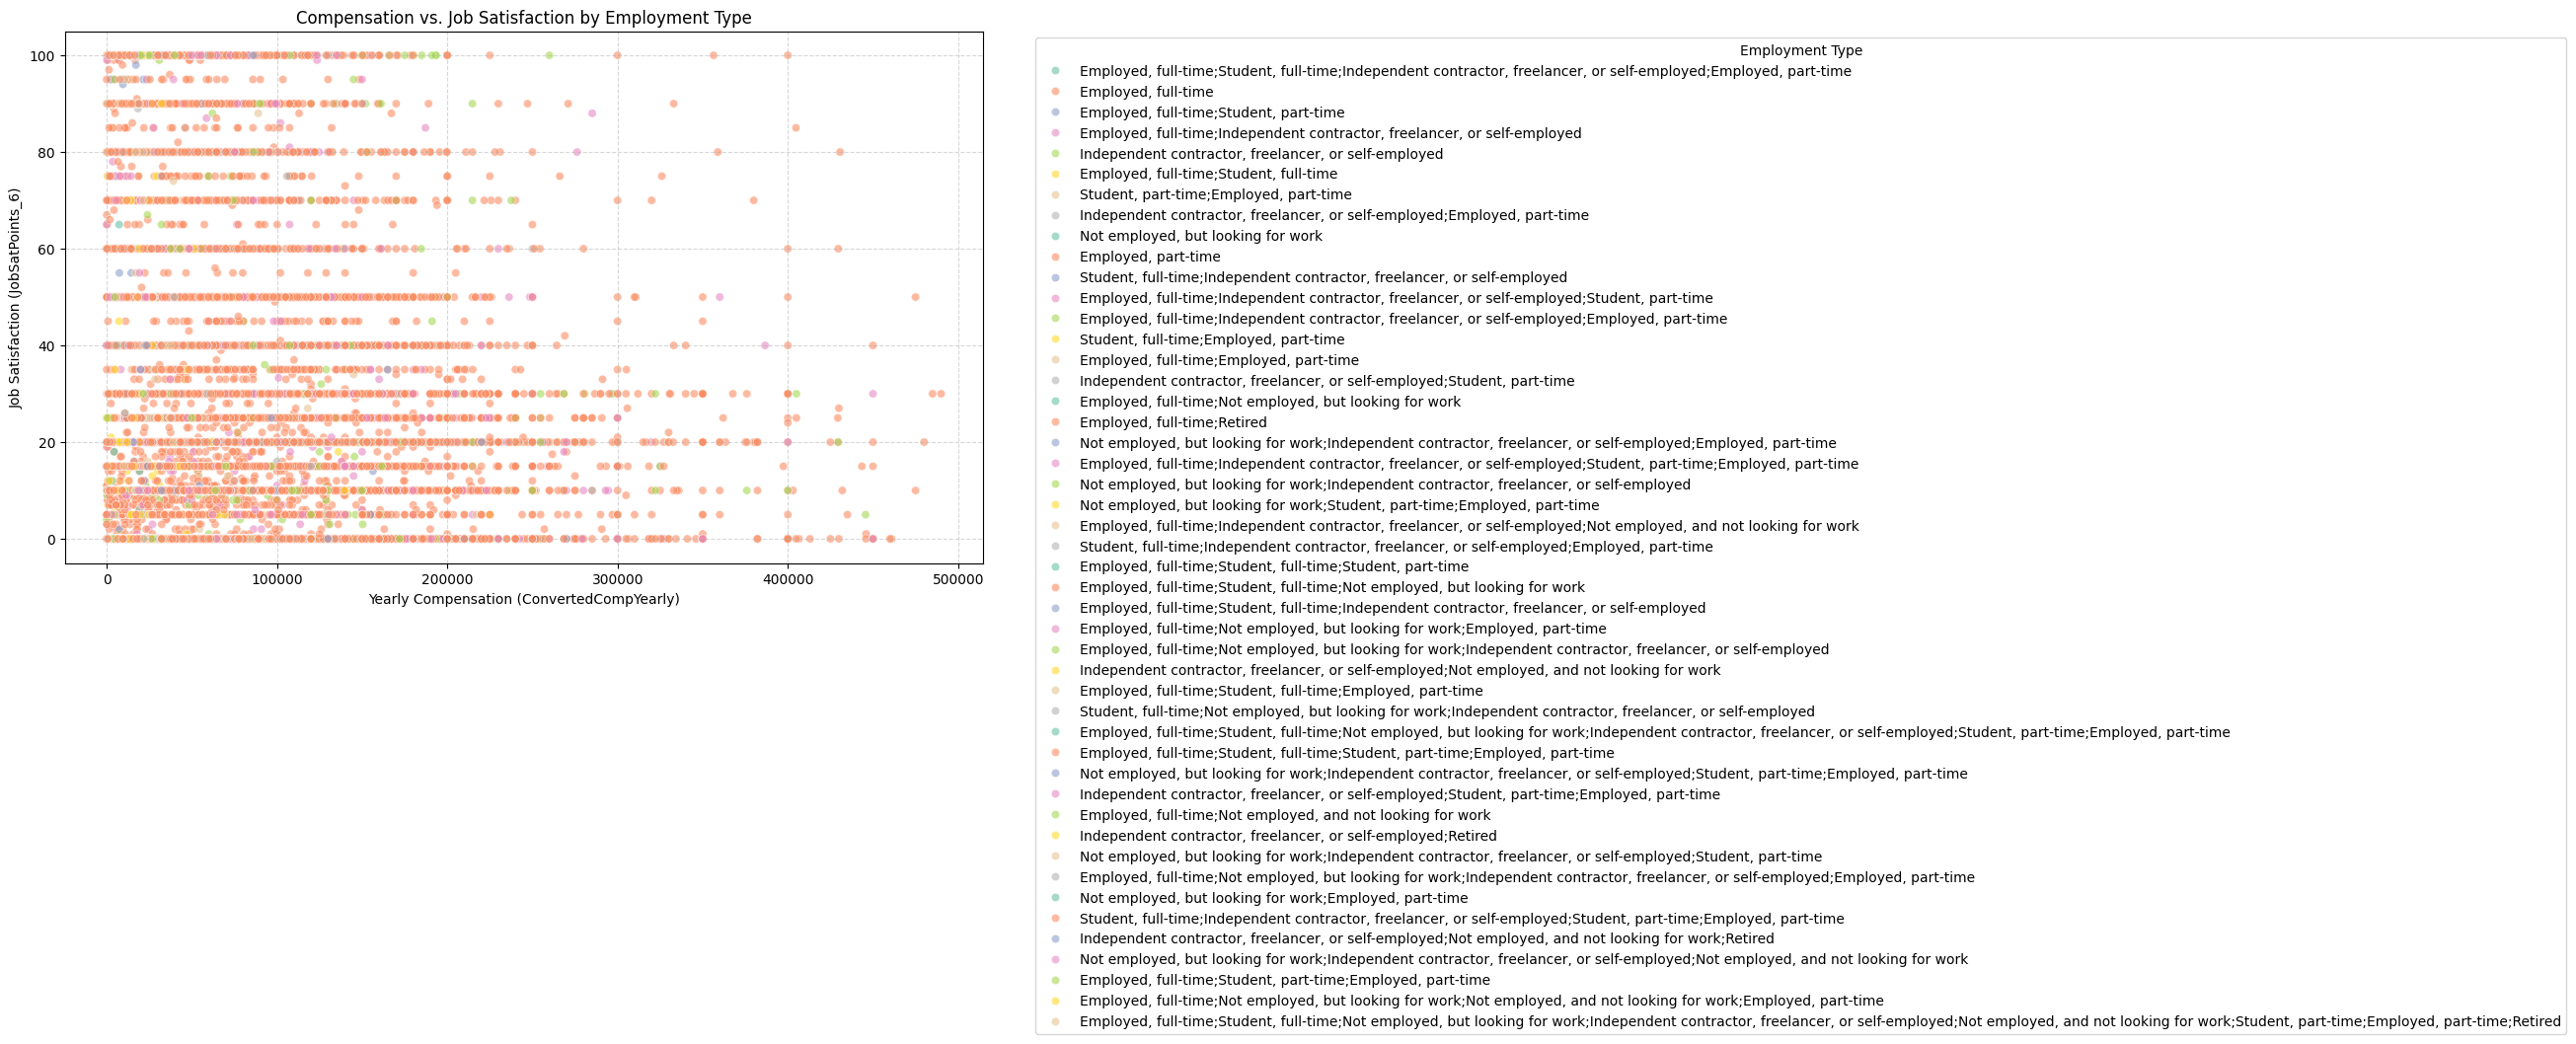

In [9]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Query relevant columns
query = """
SELECT Employment, ConvertedCompYearly, JobSatPoints_6
FROM main
WHERE Employment IS NOT NULL
AND ConvertedCompYearly IS NOT NULL
AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Optional: Filter out extreme outliers for cleaner plot
df_filtered = df[df['ConvertedCompYearly'] < 500000]

# Set plot style
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_filtered,
    x='ConvertedCompYearly',
    y='JobSatPoints_6',
    hue='Employment',
    alpha=0.6,
    palette='Set2'
)

plt.title('Compensation vs. Job Satisfaction by Employment Type')
plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


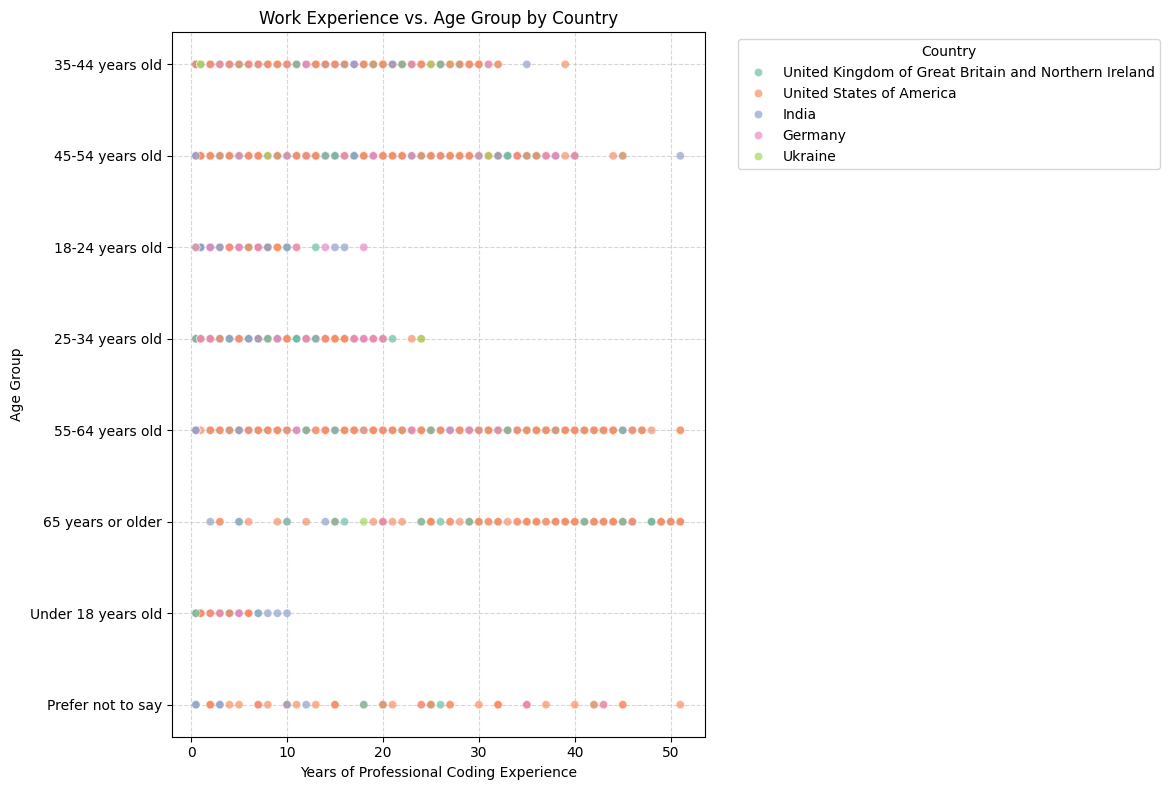

In [10]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Query the necessary columns
query = """
SELECT Country, YearsCodePro, Age
FROM main
WHERE Country IS NOT NULL
AND YearsCodePro IS NOT NULL
AND Age IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Convert YearsCodePro to numeric, handling non-numeric values like "Less than 1 year"
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': '0.5',
    'More than 50 years': '51'
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Select top 5 countries by count for a cleaner plot
top_countries = df['Country'].value_counts().head(5).index
df_filtered = df[df['Country'].isin(top_countries)]

# Set up the plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_filtered,
    x='YearsCodePro',
    y='Age',
    hue='Country',
    palette='Set2',
    alpha=0.7
)

plt.title('Work Experience vs. Age Group by Country')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Age Group')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
